# Exploratory Data Analysis - Terrorism
Performer- Pranav Ashtankar


# Importing all the libraries required for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing and observing the data
The data string is of latin1 encoding instead of UTF-8 encoding

In [2]:
data_file=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
dataframe=pd.DataFrame(data_file)
print("Data imported successfully")
dataframe.head()

C:\Users\pranav\AppData\Local\Temp\ipykernel_19376\3444244478.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data_file=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")


Data imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
dataframe.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
dataframe.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
dataframe.shape

(181691, 135)

In [6]:
for i in dataframe.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Cleaning the data

In [7]:
dataframe=dataframe[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
dataframe.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
dataframe.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [11]:
dataframe.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [10]:
dataframe.shape

(181691, 19)

In [11]:
dataframe.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [29]:
dataframe["Killed"]=dataframe["Killed"].fillna(0)
dataframe["Wounded"]=dataframe["Wounded"].fillna(0)
dataframe["Casualty"]=dataframe["Killed"]+dataframe["Wounded"]

In [30]:
dataframe.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# 1. Region Wise Attacks


 Distribution of Terrorist Attacks over Regions from 1970-2017

In [31]:
region_wise_attacks=pd.crosstab(dataframe.Year,dataframe.Region)
region_wise_attacks.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


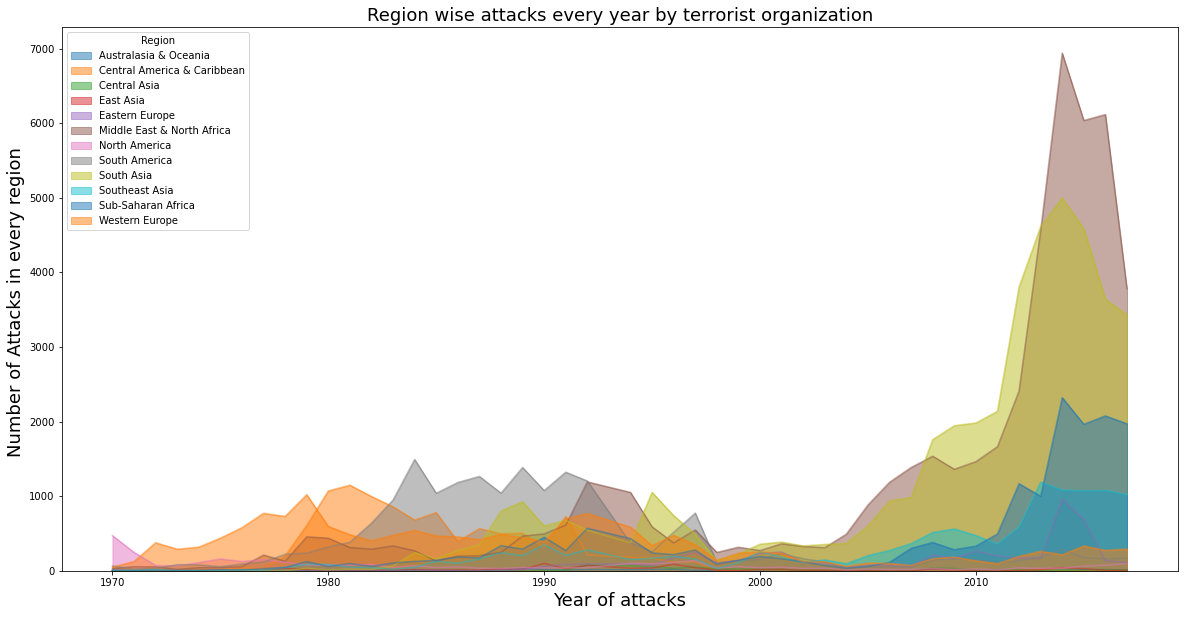

In [32]:
region_wise_attacks.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks every year by terrorist organization",fontsize=18)
plt.xlabel("Year of attacks",fontsize=18)
plt.ylabel("Number of Attacks in every region ",fontsize=18)
plt.show()

# 2.  Year wise Attacks

1. Number of Attacks in each Year

In [33]:
attacks=dataframe["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


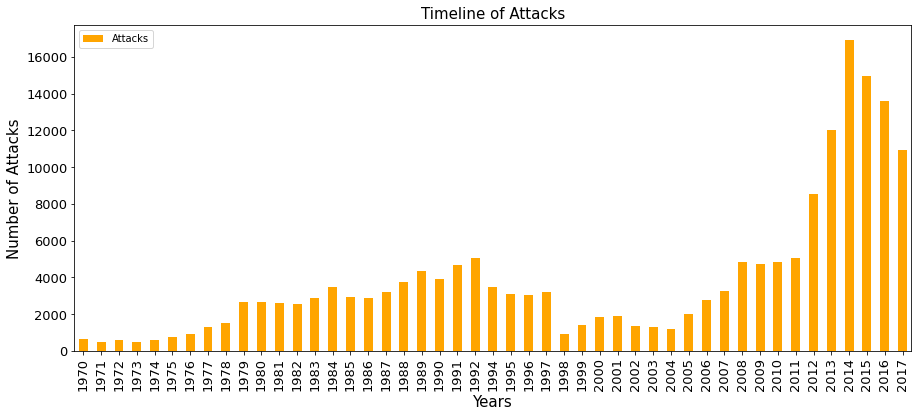

In [34]:
attacks.plot(kind="bar",color="orange",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(16903) in 2014

(ii). Least number of attacks(471) in 1971





Total Casualties (Killed + Wounded) in each Year


In [35]:
person_killed_every_year=dataframe[["Year","Killed"]].groupby("Year").sum()
person_killed_every_year.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [36]:
person_wounded_every_year=dataframe[["Year","Wounded"]].groupby("Year").sum()
person_wounded_every_year.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


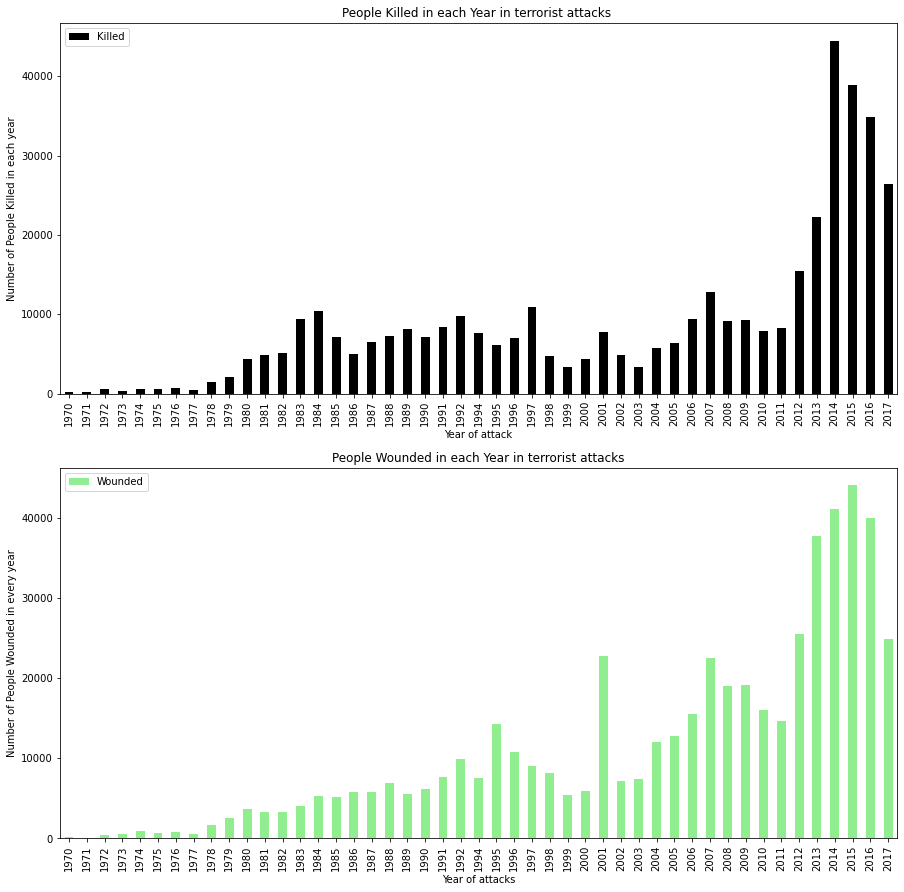

In [37]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)

#Killed
person_killed_every_year.plot(kind="bar",color="black",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year in terrorist attacks ")
ax0.set_xlabel("Year of attack")
ax0.set_ylabel("Number of People Killed in each year") 

#Wounded
ax1=fig.add_subplot(2,1,2)

person_wounded_every_year.plot(kind="bar",color="lightgreen",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year in terrorist attacks")
ax1.set_xlabel("Year of attacks")
ax1.set_ylabel("Number of People Wounded in every year")
plt.show()

#  Region wise attacks

In [38]:
region_attacks=region_wise_attacks.transpose()
region_attacks["Total"]=region_attacks.sum(axis=1)
rgn=region_attacks["Total"].sort_values(ascending=True)
rgn

Region
Australasia & Oceania            282
Central Asia                     563
East Asia                        802
North America                   3456
Eastern Europe                  5144
Central America & Caribbean    10344
Southeast Asia                 12485
Western Europe                 16639
Sub-Saharan Africa             17550
South America                  18978
South Asia                     44974
Middle East & North Africa     50474
Name: Total, dtype: int64

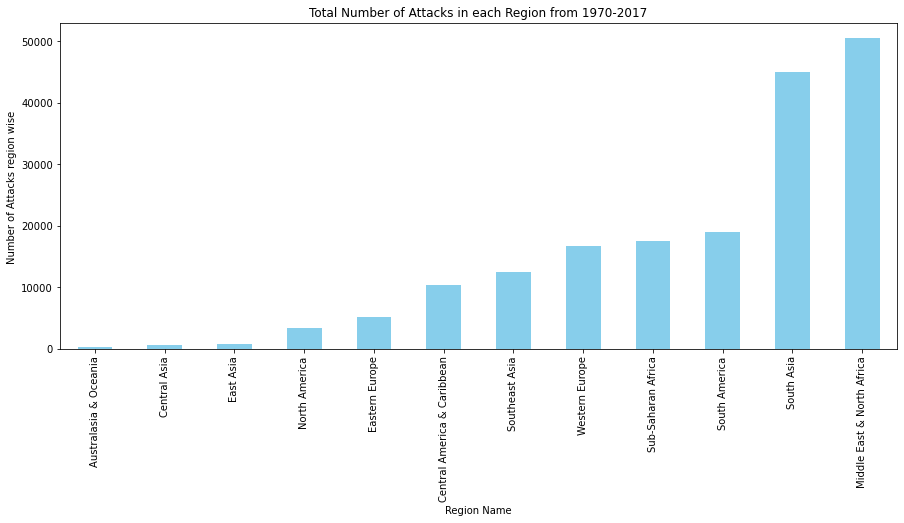

In [39]:
rgn.plot(kind="bar",color="skyblue",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region Name")
plt.ylabel("Number of Attacks region wise ")
plt.show()

1. Total Casualties (Killed + Wounded) in each Region

In [40]:
Region_wise_Casualty=dataframe[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=True)
Region_wise_Casualty

,Casualty
Region,
Australasia & Oceania,410.0
Central Asia,3009.0
East Asia,10365.0
Eastern Europe,19460.0
Western Europe,25026.0
North America,26447.0
Central America & Caribbean,37699.0
Southeast Asia,41896.0
South America,45553.0


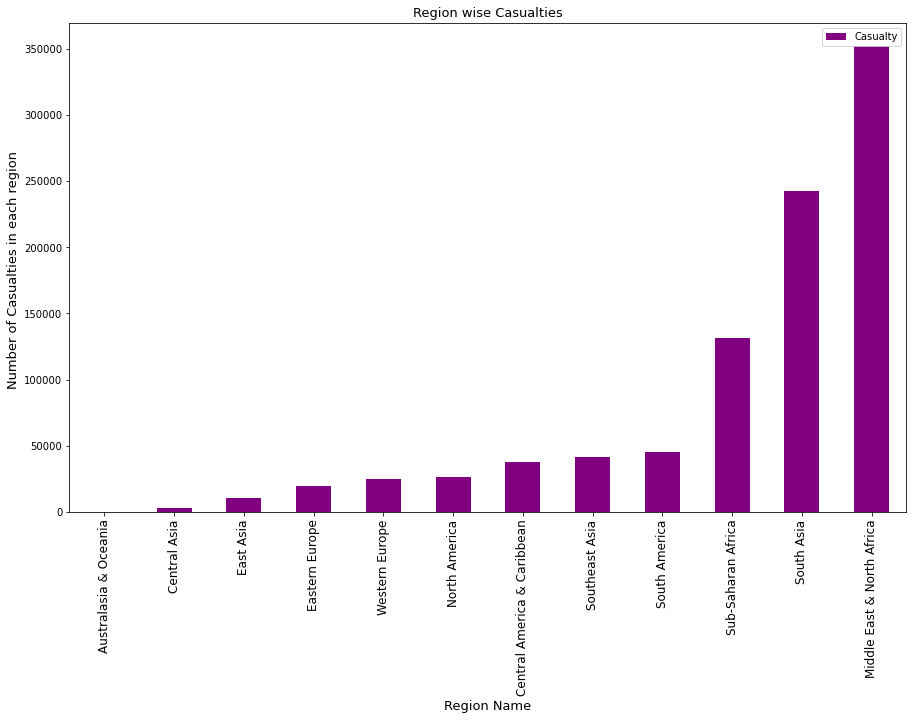

In [41]:
Region_wise_Casualty.plot(kind="bar",color="purple",figsize=(15,9))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Region Name",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties in each region ",fontsize=13)
plt.show()

In [42]:
region_wise_killings=dataframe[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=True)
region_wise_killings

,Killed
Region,
Australasia & Oceania,150.0
Central Asia,1000.0
East Asia,1152.0
North America,4916.0
Western Europe,6694.0
Eastern Europe,7415.0
Southeast Asia,15637.0
Central America & Caribbean,28708.0
South America,28849.0







Wounded in each Region

In [43]:
region_wise_wounded=dataframe[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
region_wise_wounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


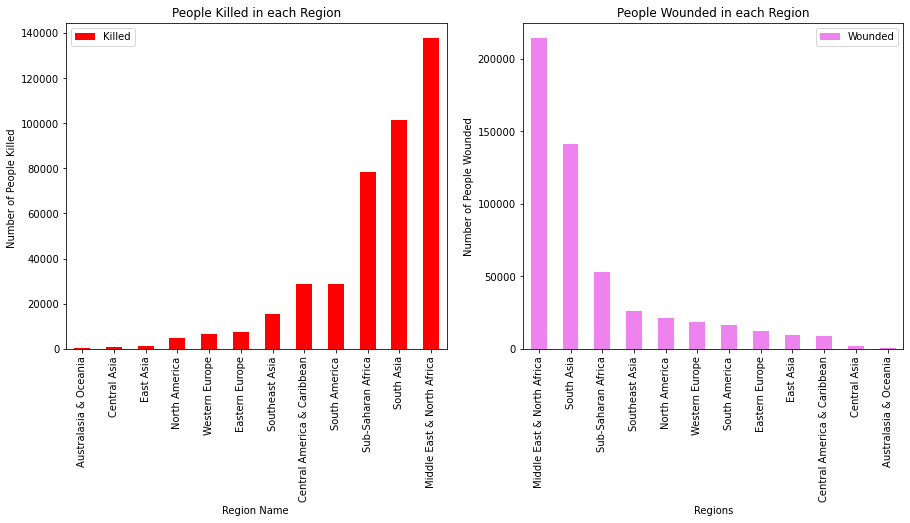

In [25]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
region_wise_killings.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Region Name ")
ax0.set_ylabel("Number of People Killed ")

#Wounded
region_wise_wounded.plot(kind="bar",color="violet",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 3. Country wise Attacks - Top 25
Number of Attacks in each Country

In [26]:
country_wise_attacks=dataframe["Country"].value_counts().head(20)
country_wise_attacks

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

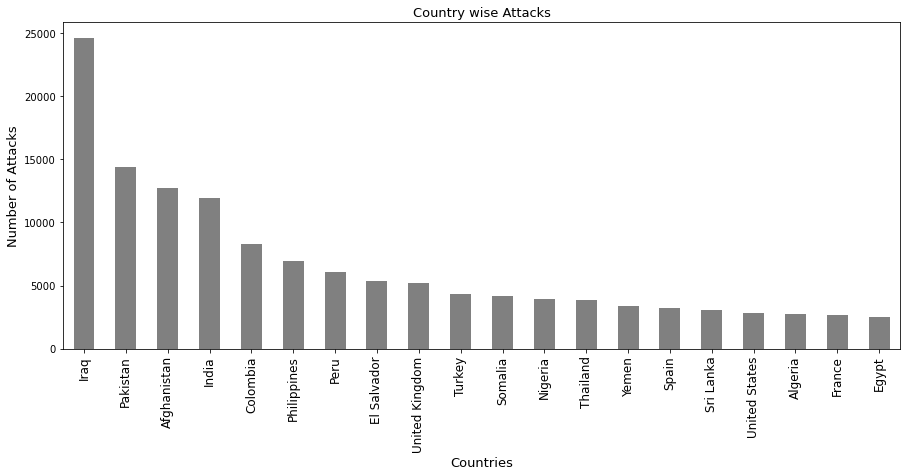

In [27]:
country_wise_attacks.plot(kind="bar",color="grey",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

Total Casualties (Killed + Wounded) in each Country

In [44]:
counrty_wise_casualty=dataframe[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
counrty_wise_casualty.head(20)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


<function matplotlib.pyplot.show(close=None, block=None)>

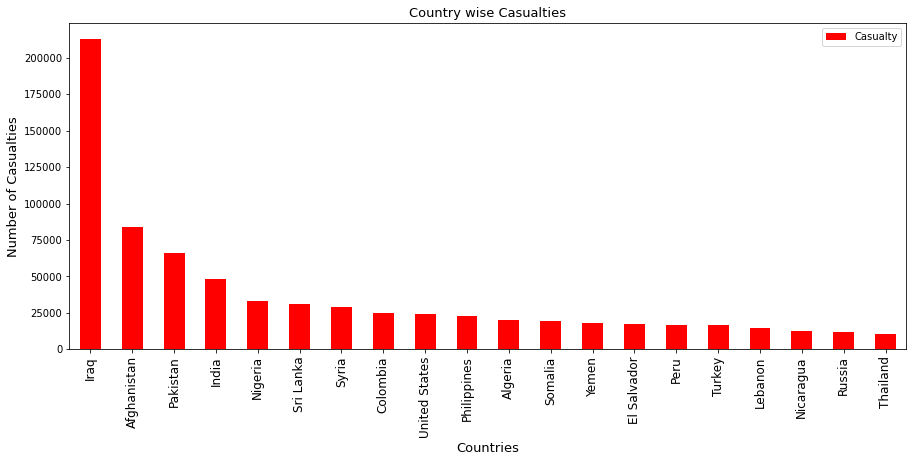

In [45]:
counrty_wise_casualty[:20].plot(kind="bar",color="red",figsize=(15,6))
plt.title("Country wise Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show

 Wounded in each Country

In [46]:
counrty_wise_wounded=dataframe[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
counrty_wise_wounded.head(20)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


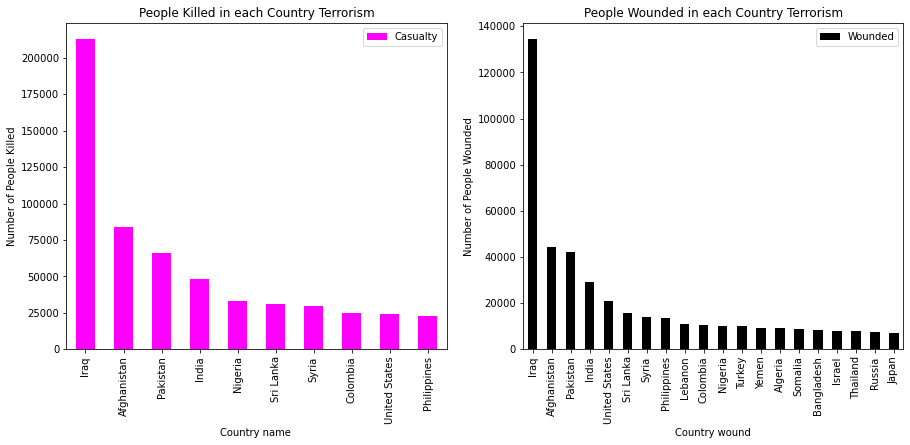

In [46]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
counrty_wise_casualty[:10].plot(kind="bar",color="magenta",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country Terrorism")
ax0.set_xlabel("Country name ")
ax0.set_ylabel("Number of People Killed")

#Wounded
counrty_wise_wounded[:20].plot(kind="bar",color="black",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country Terrorism")
ax1.set_xlabel("Country wound")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 4.City wise Attacks - Top 20

1. Number of Attacks in each city

In [50]:
city=dataframe["City"].value_counts()[1:20]
city

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: City, dtype: int64

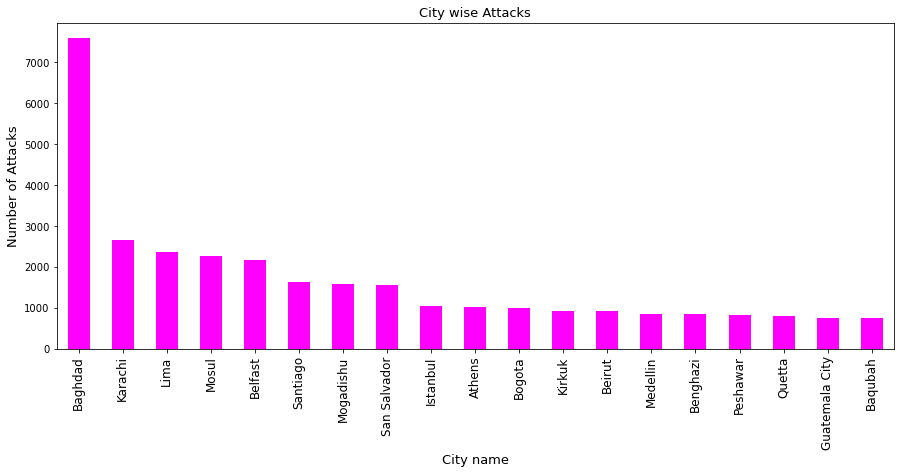

In [51]:
city.plot(kind="bar",color="magenta",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("City name",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1.Total Casualties (Killed + Wounded) in each City

In [53]:
city_casualty=dataframe[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
city_casualty.head(20)

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


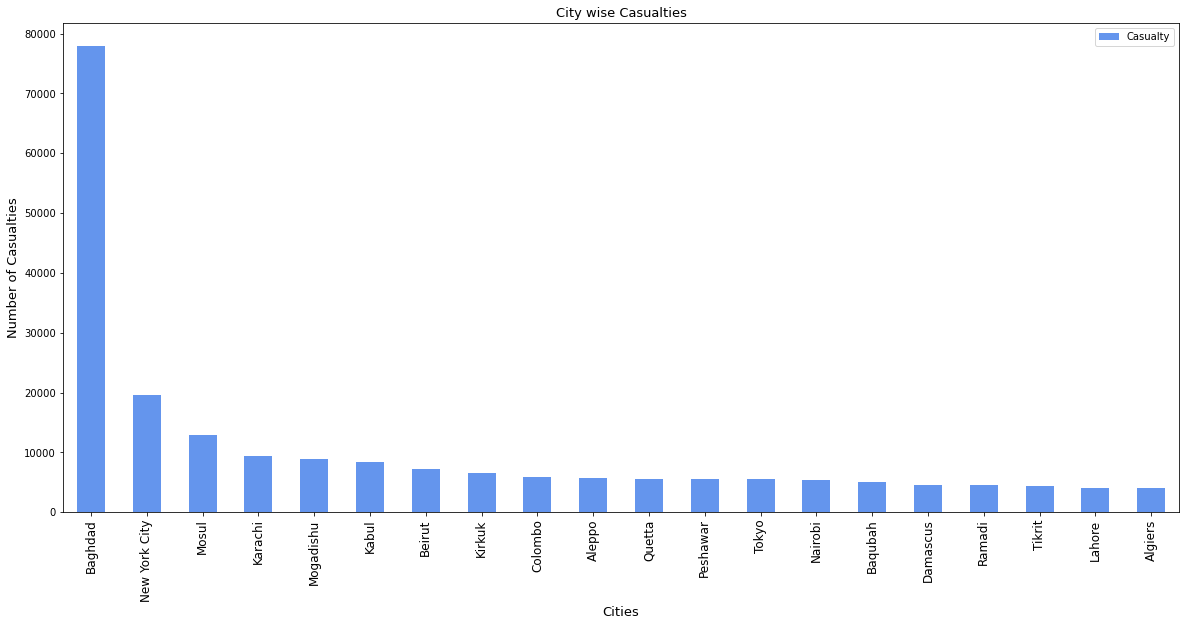

In [55]:
city_casualty[:20].plot(kind="bar",color="cornflowerblue",figsize=(20,9))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()


1.Killed in each City

In [56]:
city_klled=dataframe[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
city_klled.head(20)

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0








Wounded in each City

In [57]:
city_wounded=dataframe[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
city_wounded.head(20)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


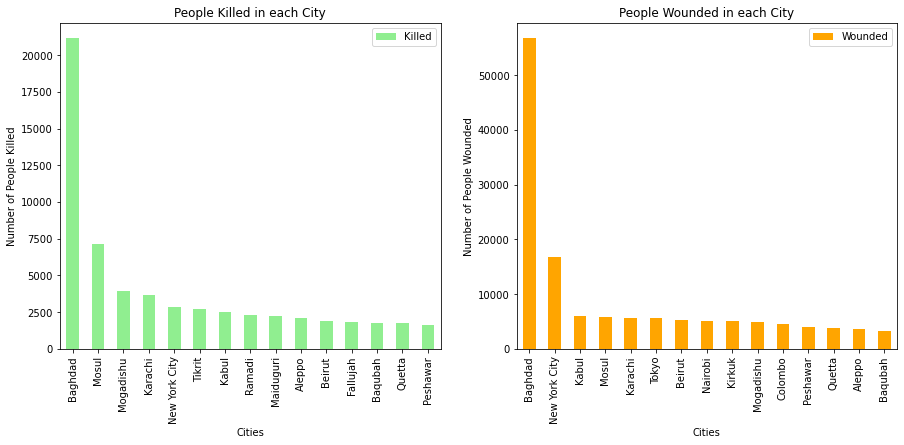

In [58]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
city_klled[:15].plot(kind="bar",color="lightgreen",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
city_wounded[:15].plot(kind="bar",color="orange",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 5. Terrorist Group wise Attacks - Top 20

1.Number of Attacks by each Group

In [59]:
terrorist_group=dataframe["Group Name"].value_counts()[1:20]
terrorist_group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

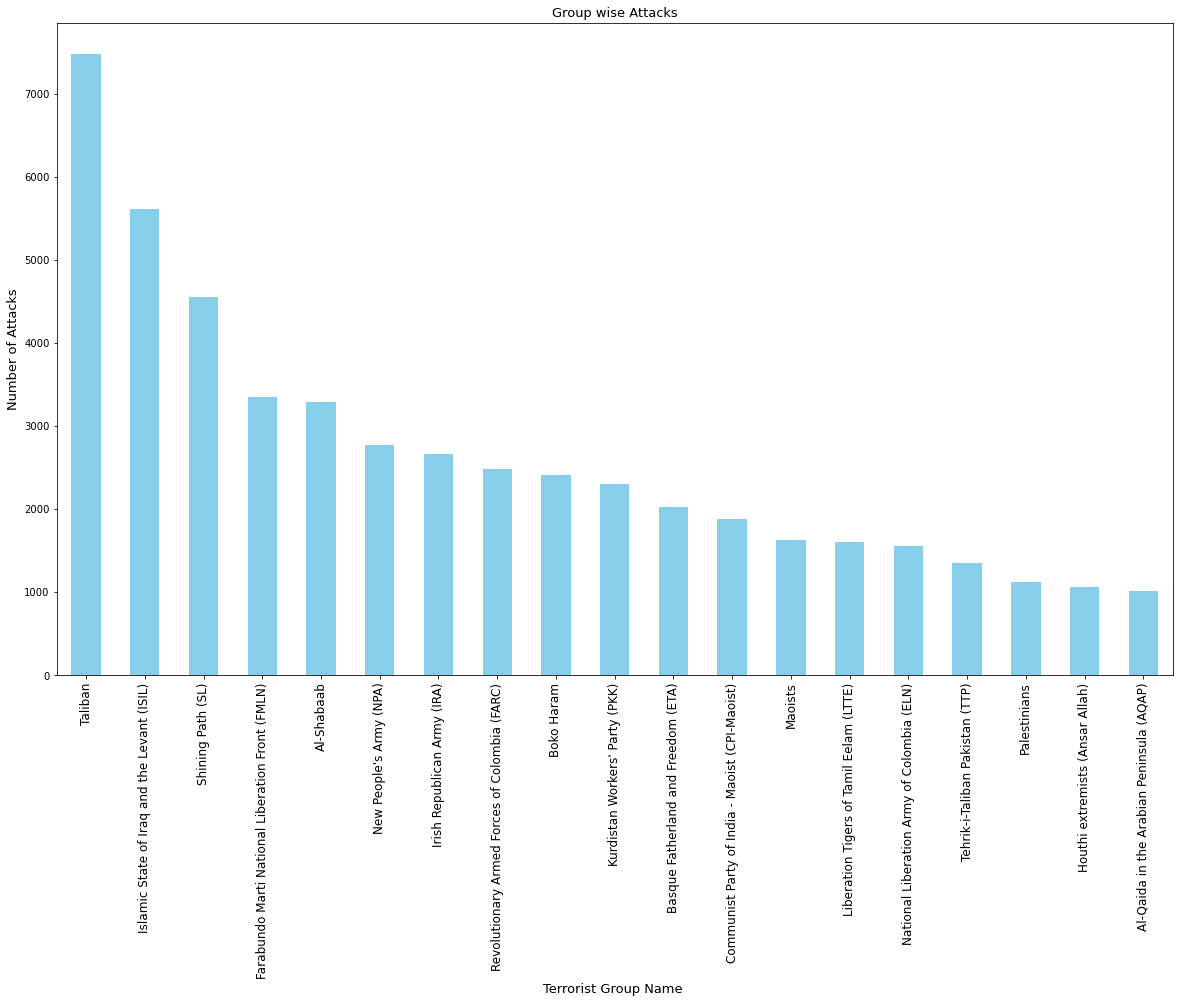

In [60]:
terrorist_group.plot(kind="bar",color="Skyblue",figsize=(20,12))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Group Name ",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()




Total Casualties(Killed + Wounded) by each Group

In [61]:
terrorist_group_casualty=dataframe[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
terrorist_group_casualty.head(20)

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


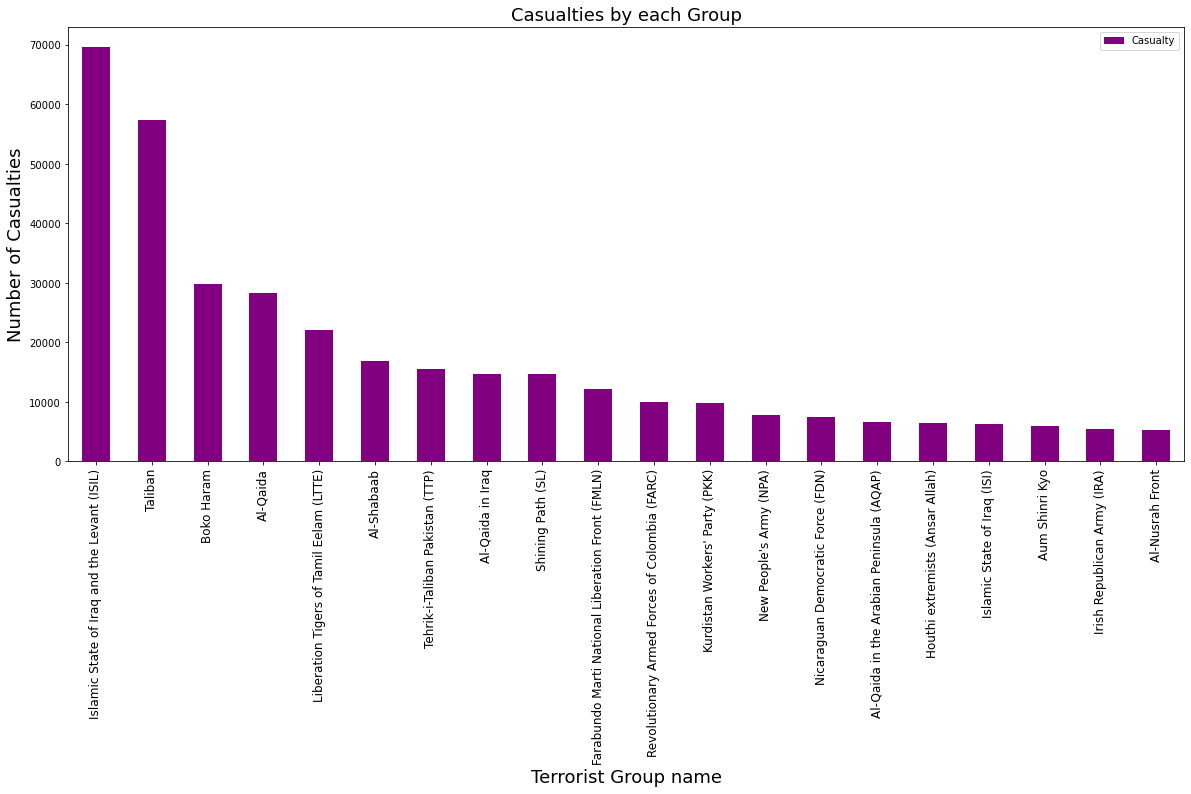

In [62]:
terrorist_group_casualty.head(20).plot(kind="bar",color="purple",figsize=(20,8))
plt.title("Casualties by each Group",fontsize=18)
plt.xlabel("Terrorist Group name",fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=18)
plt.show()

Killed by each Group

In [63]:
terrorist_group_killed=dataframe[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
terrorist_group_killed.head(20)

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


Wounded by each Group

In [64]:
terrorist_wounded=dataframe[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
terrorist_wounded.head(20)

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


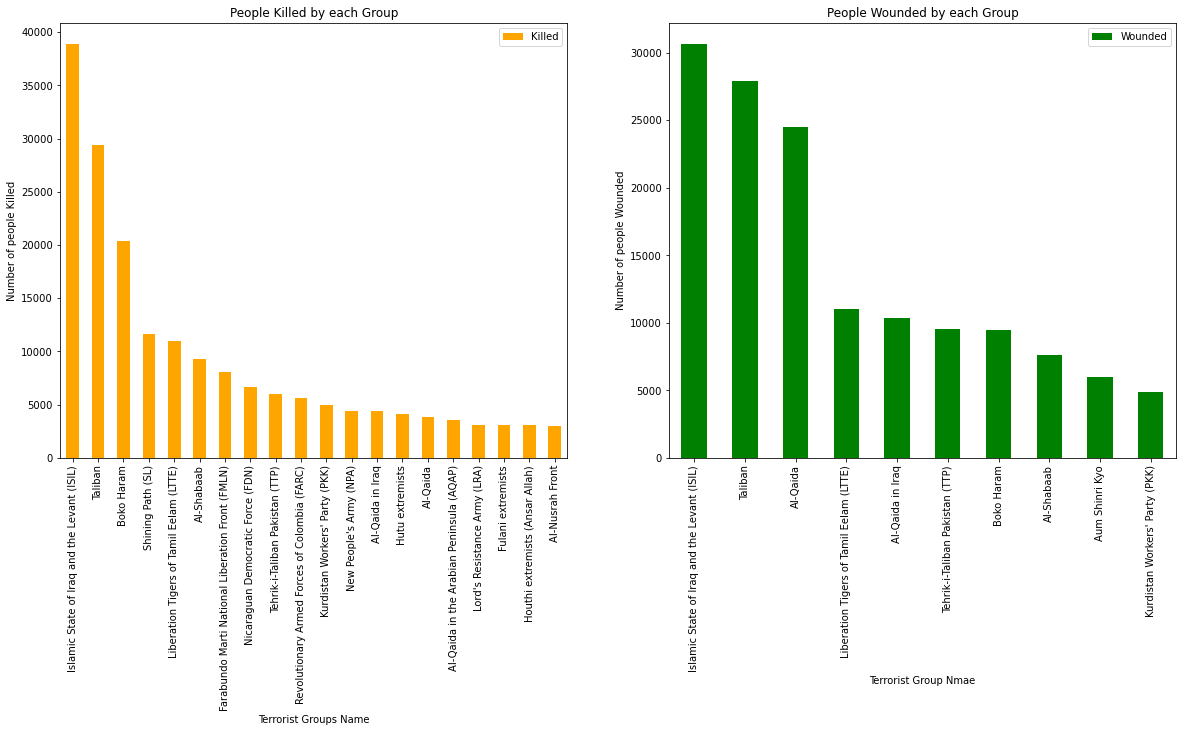

In [65]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
terrorist_group_killed[:20].plot(kind="bar",color="orange",figsize=(20,8),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups Name")
ax0.set_ylabel("Number of people Killed")

#Wounded
terrorist_wounded[:10].plot(kind="bar",color="green",figsize=(20,8),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Group Nmae")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# 6. Attack Type wise Attacks

1. Number of Attacks by each Attack Type

In [66]:
attack_type=dataframe["Attack Type"].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

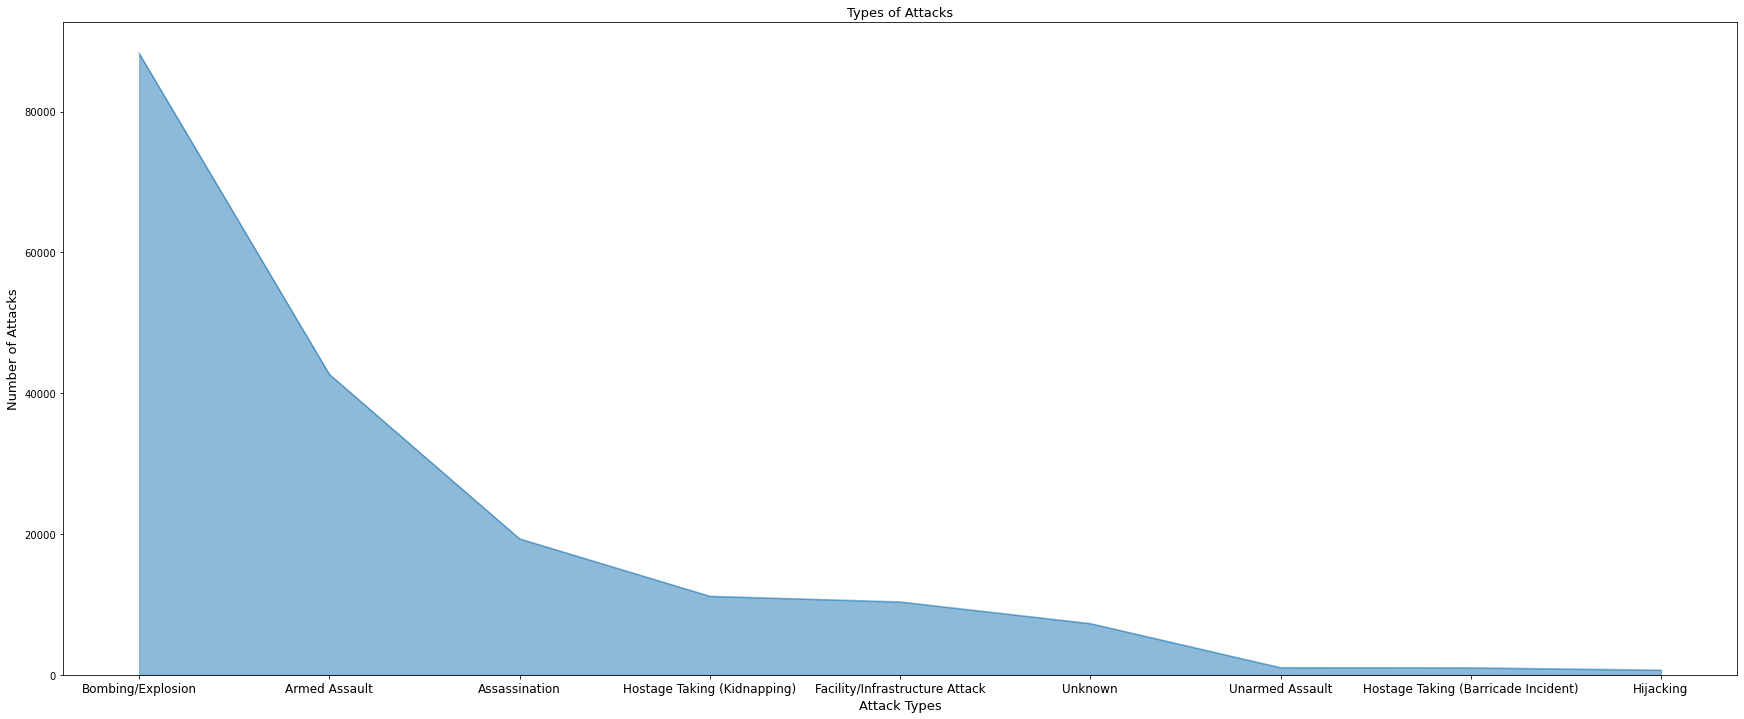

In [67]:
attack_type.plot(kind="area",alpha=0.5,figsize=(30,12))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1.Total Casualties (Killed + Wounded) by each Attack Type

In [68]:
attack_casualty=dataframe[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
attack_casualty

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


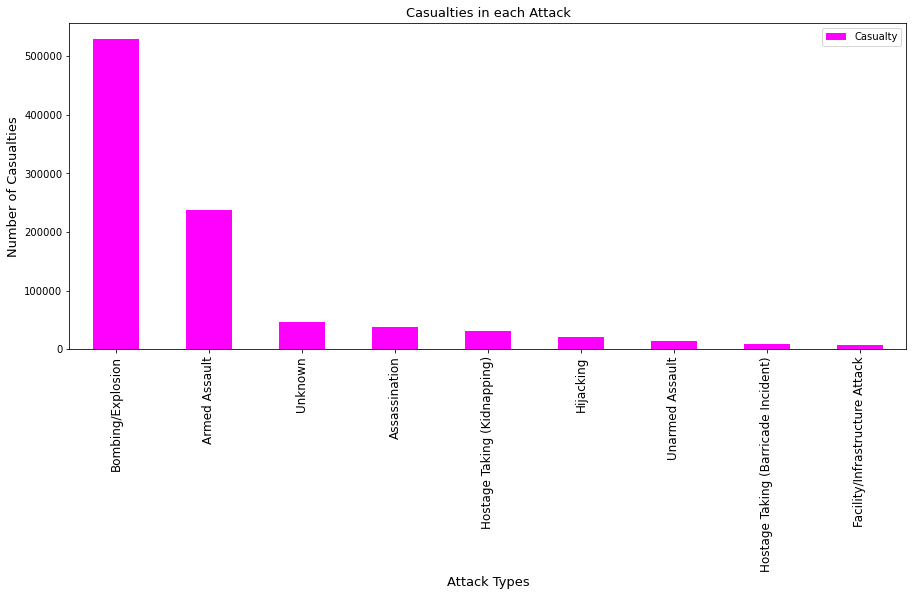

In [79]:
attack_casualty.plot(kind="bar",color="magenta",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1.Killed by each Attack Type

In [69]:
attack_killed=dataframe[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
attack_killed

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


1.Wounded by each Attack Type

In [70]:
attack_wounded=dataframe[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
attack_wounded

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


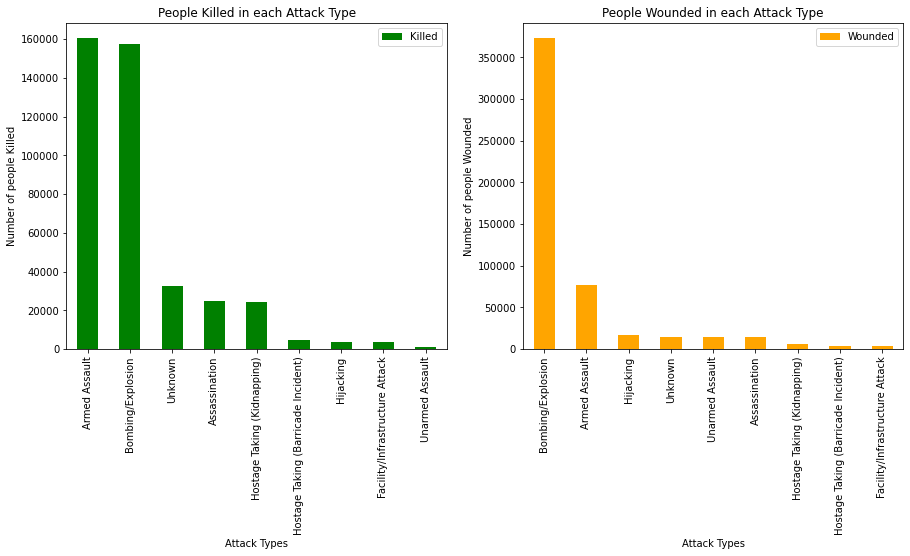

In [71]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
attack_killed.plot(kind="bar",color="green",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
attack_wounded.plot(kind="bar",color="orange",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# 7. Target Type wise Attacks

1.Number of Attacks over each Target Type

In [72]:
target_type=dataframe["Target Type"].value_counts()
target_type

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

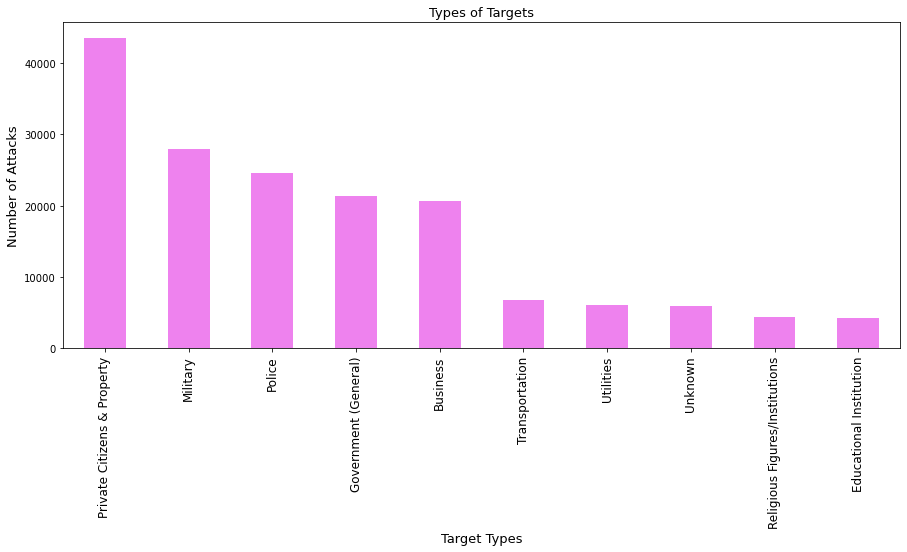

In [73]:
target_type[0:10].plot(kind="bar",color="violet",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [74]:
casualty_attack_type=dataframe[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
casualty_attack_type

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


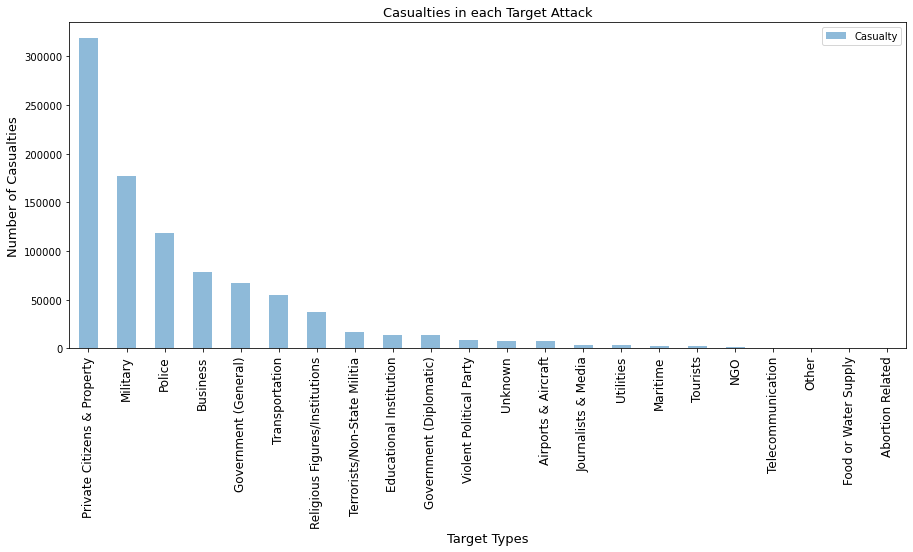

In [75]:
casualty_attack_type.plot(kind="bar",alpha=0.5,figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [76]:
attack_type_killed=dataframe[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
attack_type_killed

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


In [77]:
attack_type_wounded=dataframe[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
attack_type_wounded

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


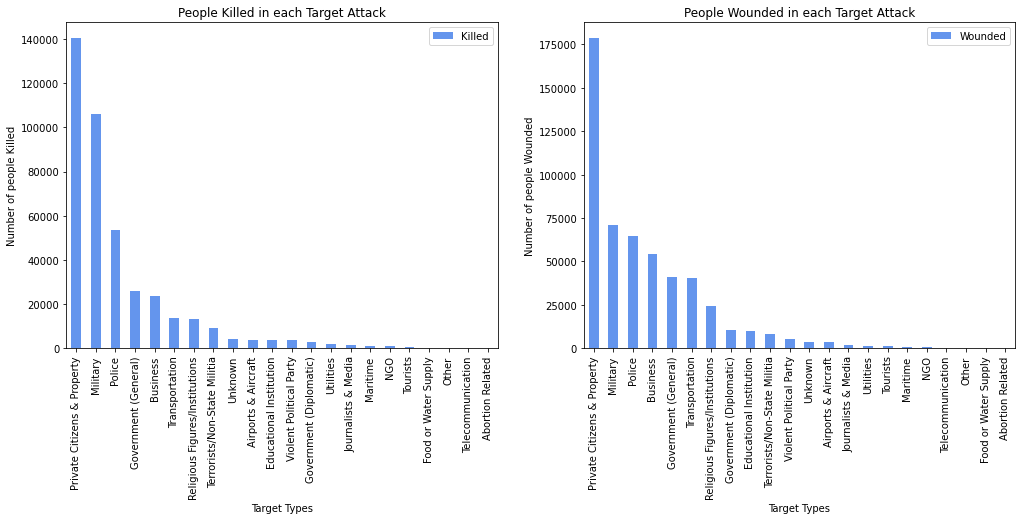

In [78]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
attack_type_killed.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
attack_type_wounded.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# 8. Group + Country wise  Top-20

1.Sorting by number of Attacks

In [79]:
group_country_attacks=dataframe[["Group Name","Country"]].value_counts().drop("Unknown")
group_country_attacks.head(20)

C:\Users\pranav\AppData\Local\Temp\ipykernel_19376\2517485216.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  group_country_attacks=dataframe[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Basque Fatherland and Freedom (ETA)               Spain             1975
Communist Party of India - Maoist (CPI-Maoist)    India             1877
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka

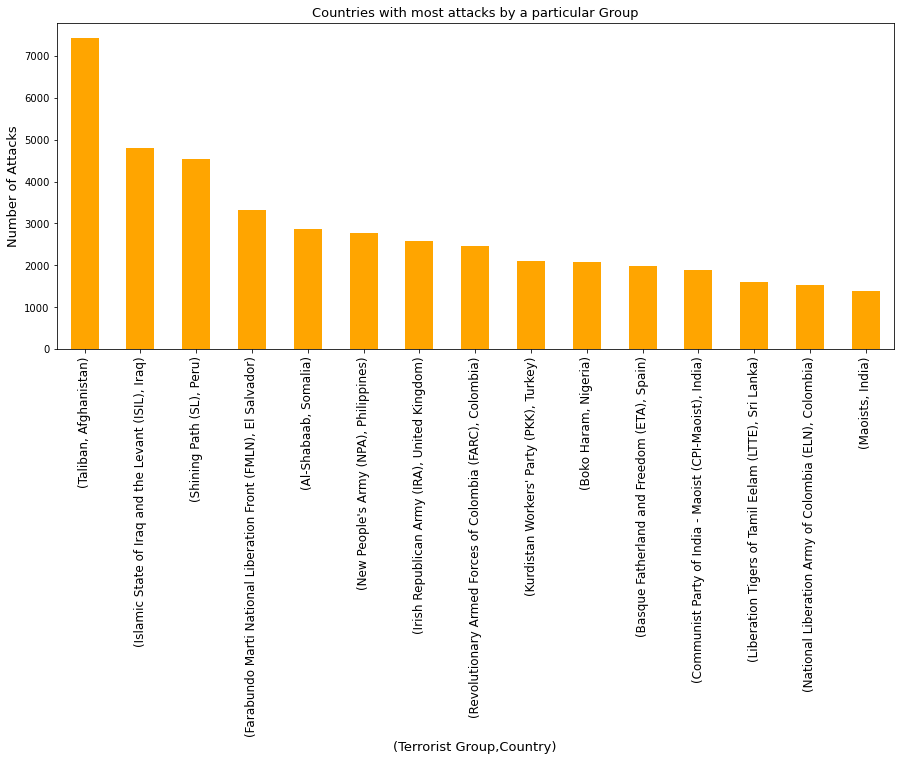

In [80]:
group_country_attacks.head(15).plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1.Sorting by Number of Casualties

In [81]:
group_country_casulaty=dataframe[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(20)
group_country_casulaty

C:\Users\pranav\AppData\Local\Temp\ipykernel_19376\161779705.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  group_country_casulaty=dataframe[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(20)


,,Casualty
Group Name,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


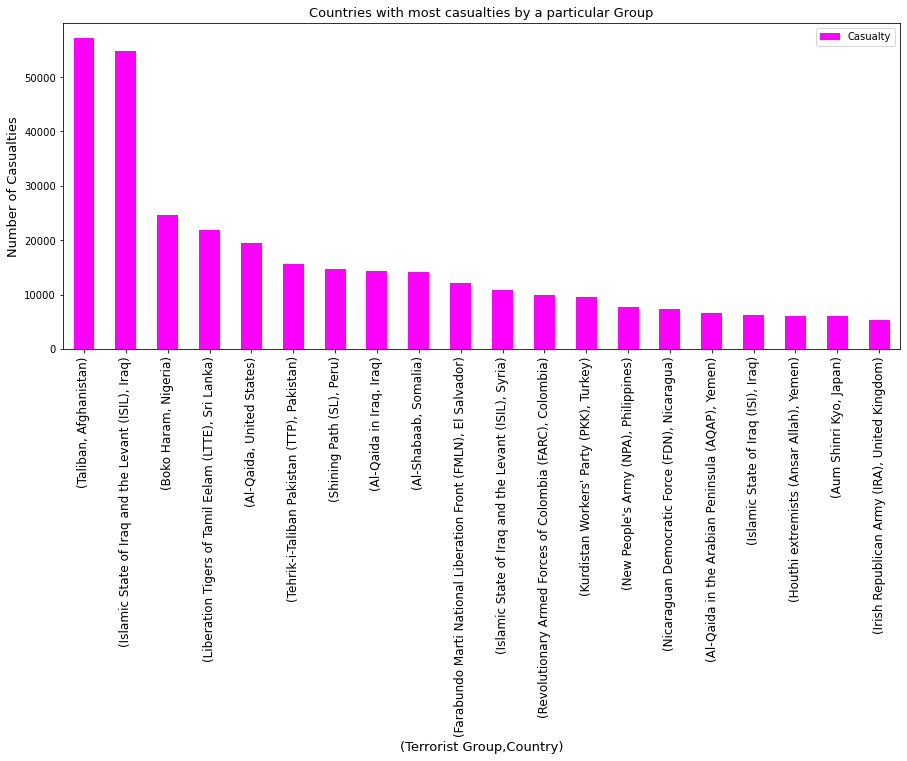

In [82]:
group_country_casulaty.plot(kind="bar",color="magenta",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1.Sorting by Number of People Killed

In [83]:
group_country_killed=dataframe[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(20)
group_country_killed

C:\Users\pranav\AppData\Local\Temp\ipykernel_19376\1943413904.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  group_country_killed=dataframe[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(20)


,,Killed
Group Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


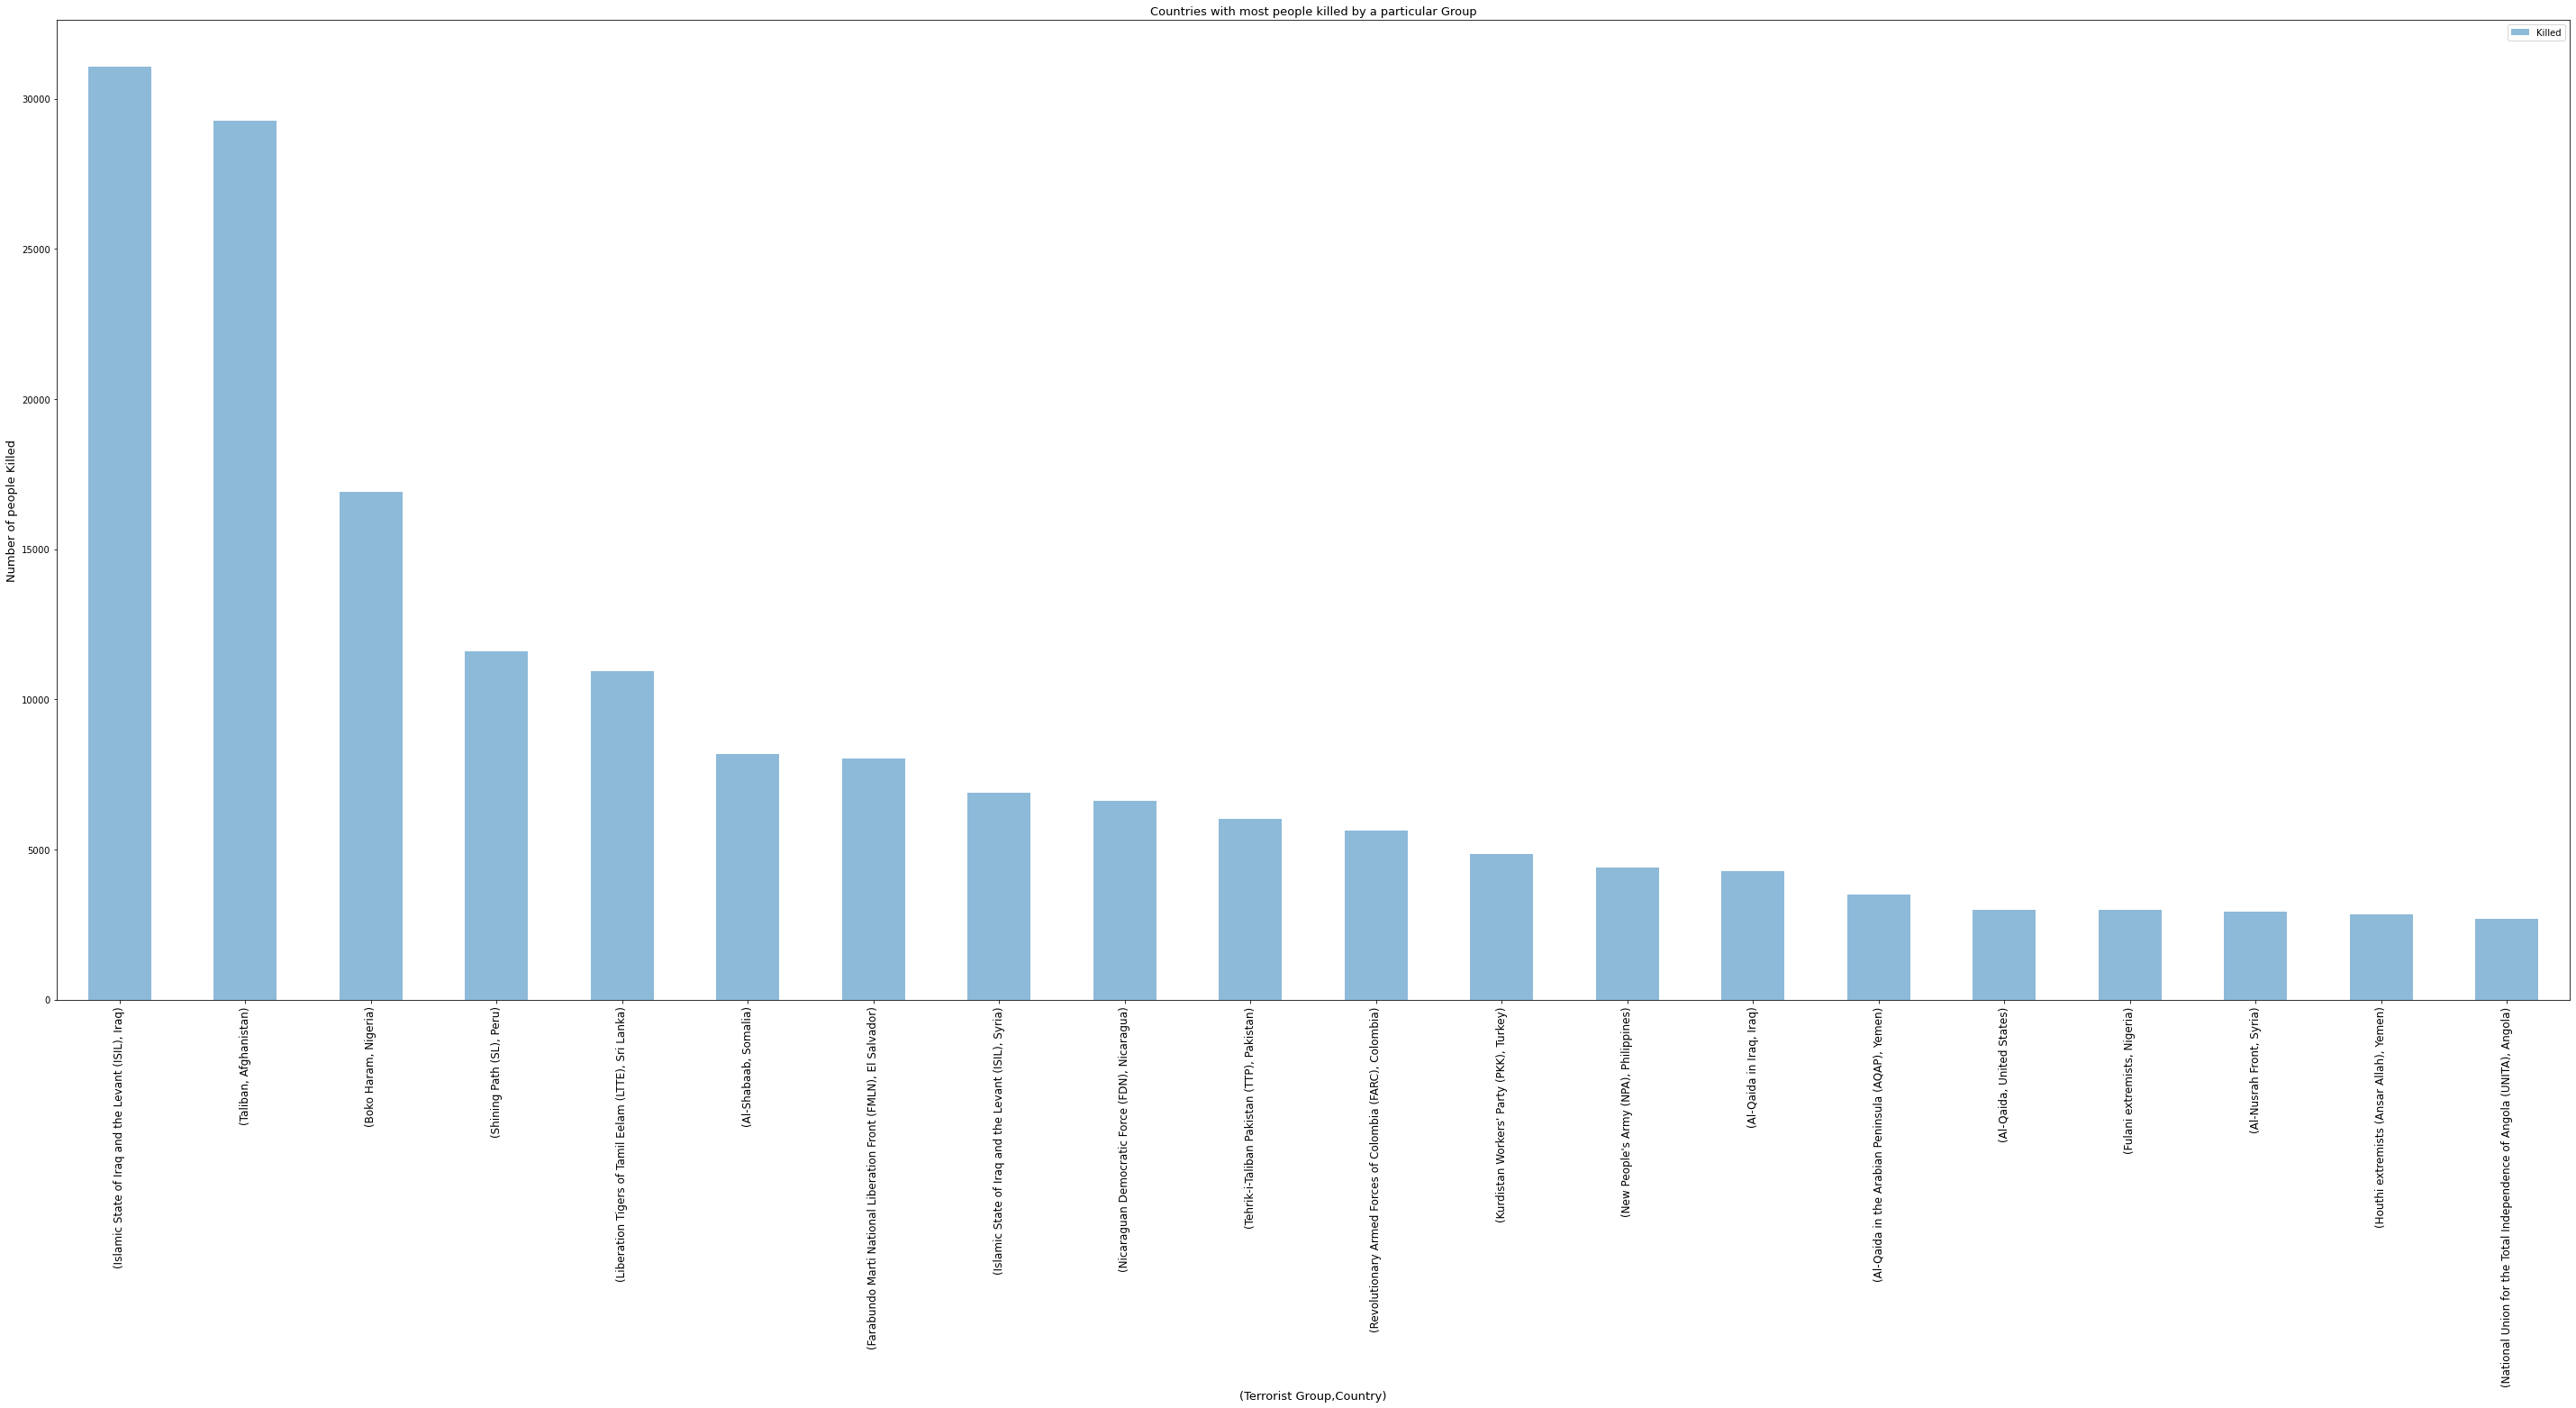

In [84]:
group_country_killed.plot(kind="bar",alpha=0.5,figsize=(50,20))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

1.Sorting by Number of People Wounded

In [89]:
group_country_wounded=dataframe[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(20)
group_country_wounded

C:\Users\pranav\AppData\Local\Temp\ipykernel_19376\3044064241.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  group_country_wounded=dataframe[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(20)


,,Wounded
Group Name,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


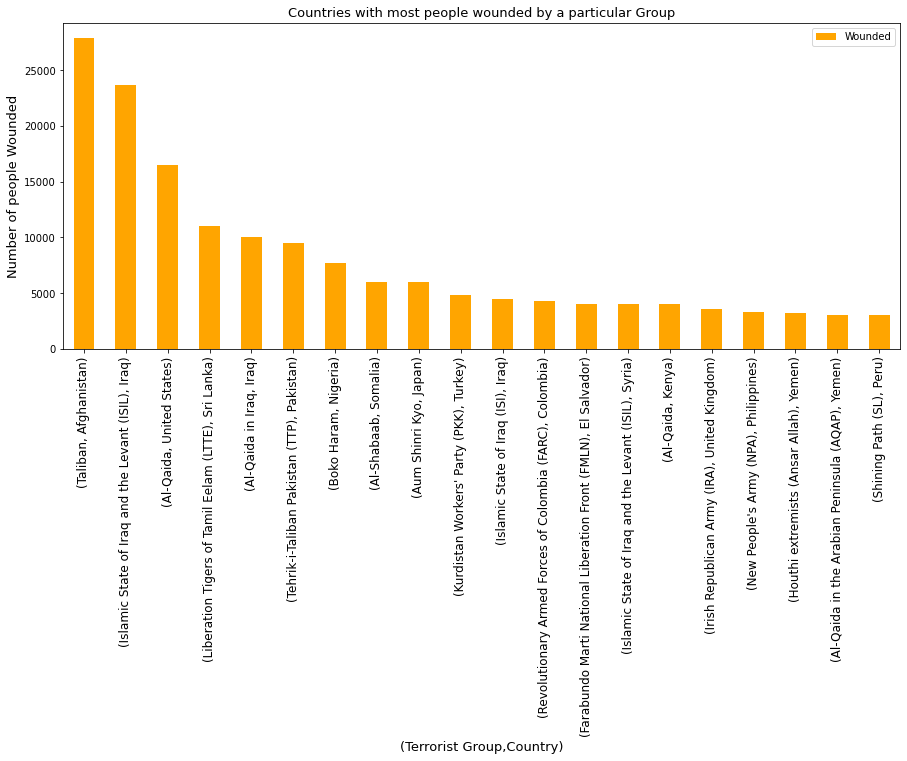

In [90]:
group_country_wounded.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

# 9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [86]:
casualty=dataframe.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0
















1. Killed due to Terrorist Attacks

In [87]:
kill=dataframe.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


1.Wounded due to Terrorist Attacks

In [88]:
wound=dataframe.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


# Observations